# **IPC Chile 1922-2025 Analisis exploratorio y Visualizaci√≥n**
## Objetivo: Comprender la evoluci√≥n del IPC y sus caracter√≠sticas estad√≠sticas.

### El objetivo se desglosar√° respondiendo las siguientes preguntas:


* ¬øC√≥mo ha sido la variaci√≥n mensual del IPC a lo largo de la historia
registrada en los datos?

* ¬øCu√°les fueron los 5 a√±os de mayor y menor inflaci√≥n en Chile seg√∫n este indicador?

* ¬øExisten d√©cadas o periodos presidenciales que muestren un comportamiento inflacionario marcadamente diferente?

* ¬øCu√°l es la distribuci√≥n estad√≠stica de la variaci√≥n del IPC? ¬øEs sim√©trica? ¬øTiene valores extremos (outliers)?





In [14]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_excel('Indicador.xls', skiprows=3)

In [16]:
df.head()

Mes  Valor
0 1928-03-01    0.0
1 1928-04-01    2.0
2 1928-05-01    3.9
3 1928-06-01    1.9
4 1928-07-01    0.0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mes     1171 non-null   datetime64[ns]
 1   Valor   1171 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.4 KB


In [18]:
df.columns = ['Fecha', 'Variacion_IPC']
df

Fecha  Variacion_IPC
0    1928-03-01            0.0
1    1928-04-01            2.0
2    1928-05-01            3.9
3    1928-06-01            1.9
4    1928-07-01            0.0
...         ...            ...
1166 2025-05-01            0.2
1167 2025-06-01           -0.4
1168 2025-07-01            0.9
1169 2025-08-01            0.0
1170 2025-09-01            0.4

[1171 rows x 2 columns]

In [19]:
#Verificamos si hay valores nulos
print(df.isnull().sum())

Fecha            0
Variacion_IPC    0
dtype: int64


In [20]:
#Estad√≠sticas descriptivas
df['Variacion_IPC'].describe()

count    1171.000000
mean        1.773954
std         4.016895
min       -10.900000
25%         0.200000
50%         0.900000
75%         2.300000
max        87.600000
Name: Variacion_IPC, dtype: float64

**üìà Interpretaci√≥n general:**

*El IPC chileno ha sido positivo la mayor parte del tiempo (inflaci√≥n mensual moderada).

*La alta desviaci√≥n est√°ndar (4.0) y el m√°ximo tan elevado (87.6) indican que el pa√≠s tuvo episodios de inflaci√≥n extrema.

*La mediana de 0.9% muestra que, fuera de esos per√≠odos de crisis, la inflaci√≥n mensual t√≠pica es baja o moderada.

## Visualizaci√≥n de la Serie Temporal

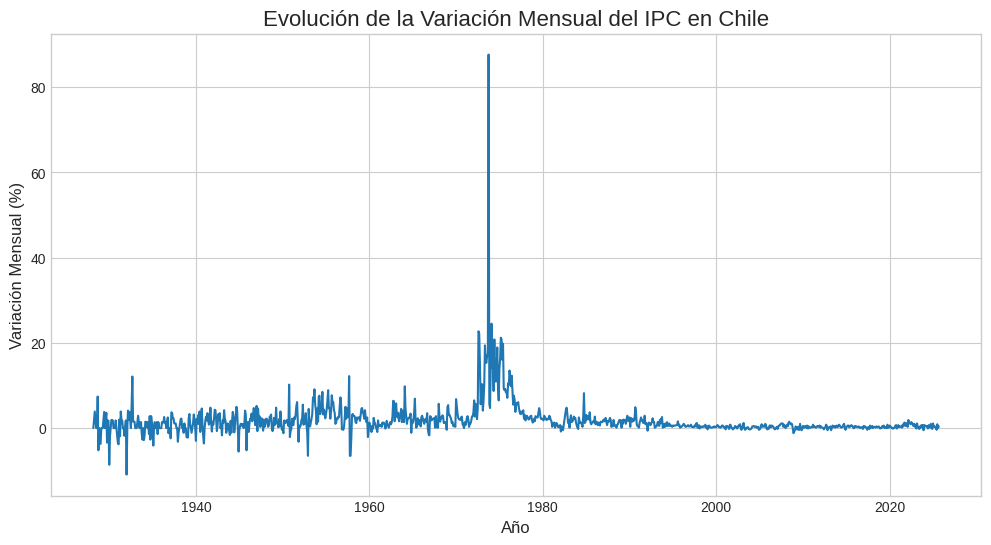

In [21]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Variacion_IPC', data=df)

plt.title('Evoluci√≥n de la Variaci√≥n Mensual del IPC en Chile', fontsize= 16)
plt.xlabel('A√±o', fontsize=12)
plt.ylabel('Variaci√≥n Mensual (%)', fontsize=12)
plt.show()

## An√°lisis de la Distribuci√≥n

/tmp/ipython-input-117538491.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


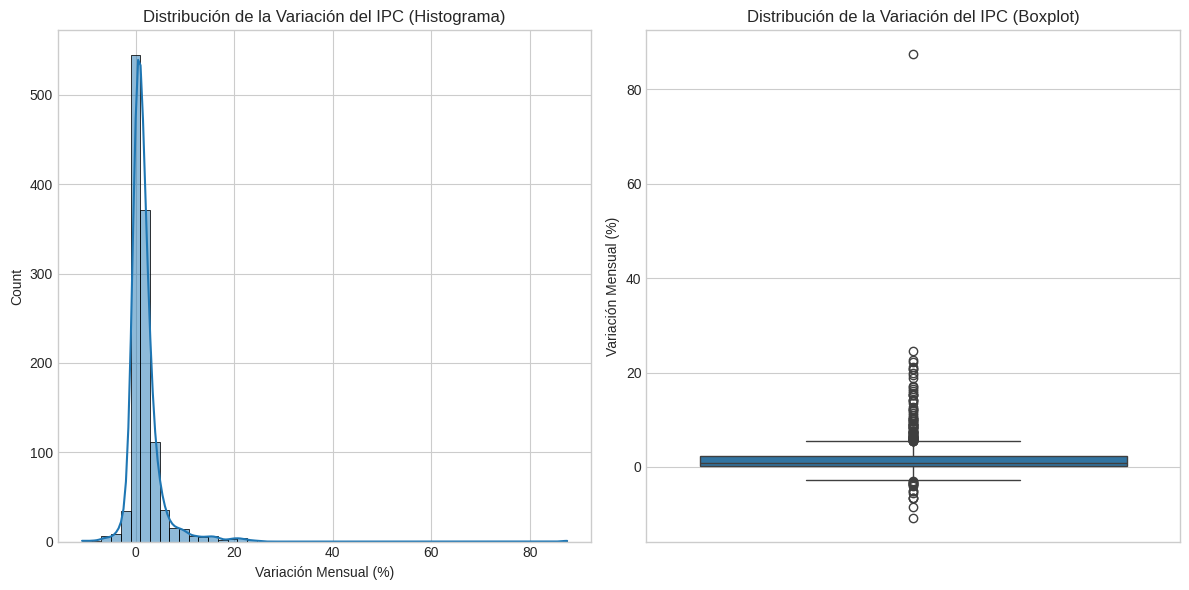

In [22]:
plt.figure(figsize=(12,6))
#Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['Variacion_IPC'], kde=True, bins=50)
plt.title('Distribuci√≥n de la Variaci√≥n del IPC (Histograma)')
plt.xlabel('Variaci√≥n Mensual (%)')

plt.legend()

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df['Variacion_IPC'])
plt.title('Distribuci√≥n de la Variaci√≥n del IPC (Boxplot)')
plt.ylabel('Variaci√≥n Mensual (%)')

plt.tight_layout()
plt.show()

üß≠ 1Ô∏è‚É£ Interpretaci√≥n del histograma (izquierda)

La inflaci√≥n mensual en Chile ha sido estable la mayor parte del tiempo, pero con algunos meses de hiperinflaci√≥n que distorsionan la escala del gr√°fico.

üß≠ 2Ô∏è‚É£ Interpretaci√≥n del boxplot (derecha)

El IPC tiene una distribuci√≥n muy sesgada hacia arriba, con outliers que representan eventos excepcionales (crisis econ√≥micas, ajustes de precios o periodos de hiperinflaci√≥n).

## Creaci√≥n de Caracter√≠sticas y Agregaci√≥n de Datos (Feature Engineering)

Pasaremos de tener solo datos mensuales a poder agruparlos y compararlos por a√±o.

* Extraeremos Componentes de la Fecha.
* Calcularemos la Inflaci√≥n Anual.
* Identificaremos los A√±os Claves.

In [23]:
#Extraer A√±o y Mes
df['A√±o'] = df['Fecha'].dt.year
df.head()

Fecha  Variacion_IPC   A√±o
0 1928-03-01            0.0  1928
1 1928-04-01            2.0  1928
2 1928-05-01            3.9  1928
3 1928-06-01            1.9  1928
4 1928-07-01            0.0  1928

In [24]:
#Calcular la inflaci√≥n anual
#Convertimos la variaci√≥n porcentual a un factor de crecimiento
df['Factor_Crecimiento'] = 1 + (df['Variacion_IPC'] / 100)

#Agrupamos por a√±o y multiplicamos todos los factores de crecimiento de ese a√±o
inflacion_anual = df.groupby('A√±o')['Factor_Crecimiento'].prod()

#Convertimos el producto acumulado de vuelta a porcentaje
inflacion_anual = (inflacion_anual - 1) * 100

#Convertimos la serie resultante a un DF para manejarlo mejor
df_anual = inflacion_anual.reset_index()
df_anual.columns = ['A√±o', 'Inflacion_Anual_Compuesta']

In [25]:
#Identificamos los a√±os clave
#Ordenamos los valores para ver los a√±os de mayor inflaci√≥n.
top_5_mayor_inflacion = df_anual.sort_values(by='Inflacion_Anual_Compuesta', ascending=False).head(5)
print(top_5_mayor_inflacion)

     A√±o  Inflacion_Anual_Compuesta
45  1973                 508.310420
46  1974                 375.883326
47  1975                 340.809256
48  1976                 174.166723
44  1972                 163.548627


üß≠ Conclusi√≥n econ√≥mica

Entre 1972 y 1976, Chile vivi√≥ su peor crisis inflacionaria del siglo XX, con niveles de inflaci√≥n superiores al 100% anual durante cinco a√±os consecutivos.

El pico fue 1973, con m√°s de 500% anual.

Esto significa que los precios se multiplicaban cada pocos meses, destruyendo el poder adquisitivo.

A partir de 1977‚Äì1978, la inflaci√≥n comenz√≥ a controlarse gradualmente hasta estabilizarse por debajo del 30% anual en los a√±os siguientes.

In [26]:
#Ordenamos los valores para ver los a√±os con menor inflaci√≥n.
top_5_menor_inflacion = df_anual.sort_values(by='Inflacion_Anual_Compuesta', ascending=True).head(5)
print(top_5_menor_inflacion)

     A√±o  Inflacion_Anual_Compuesta
2   1930                  -5.251877
81  2009                  -1.601235
7   1935                  -1.415330
3   1931                  -0.018866
75  2003                   1.093152


En resumen:

Los valores negativos de tu variable Inflacion_Anual_Compuesta indican a√±os de deflaci√≥n, donde los precios promedio bajaron. Esto suele ocurrir en crisis econ√≥micas profundas o en periodos de muy baja demanda.

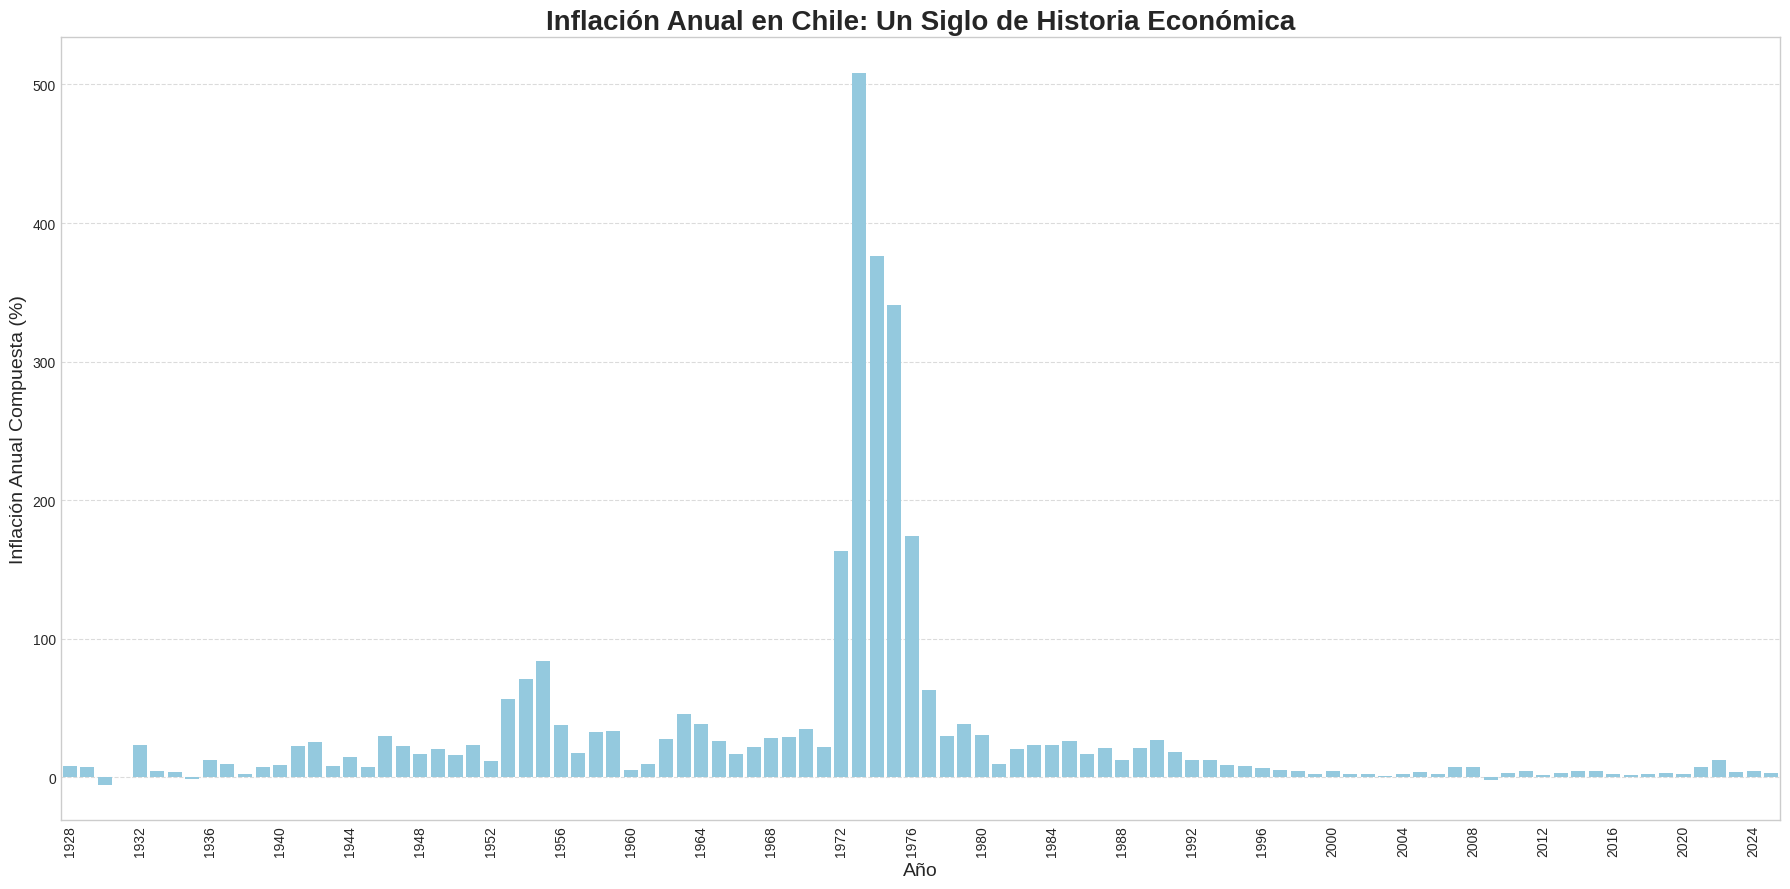

In [29]:
a√±o_max_inflacion = df_anual.loc[df_anual['Inflacion_Anual_Compuesta'].idxmax()]

plt.figure(figsize=(18, 9))
plot = sns.barplot(x='A√±o', y='Inflacion_Anual_Compuesta', data=df_anual, color='skyblue')

plt.title('Inflaci√≥n Anual en Chile: Un Siglo de Historia Econ√≥mica', fontsize=20, weight='bold')
plt.xlabel('A√±o', fontsize=14)
plt.ylabel('Inflaci√≥n Anual Compuesta (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# A√±adimos una anotaci√≥n para destacar el punto m√°s importante.
plt.annotate(
    f"Pico hist√≥rico\n{a√±o_max_inflacion['A√±o']}: {a√±o_max_inflacion['Inflacion_Anual_Compuesta']:.0f}%",
    xy=(a√±o_max_inflacion['A√±o'], a√±o_max_inflacion['Inflacion_Anual_Compuesta']),
    xytext=(a√±o_max_inflacion['A√±o'], a√±o_max_inflacion['Inflacion_Anual_Compuesta'] + 50),
    arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='center',
    fontsize=12,
    weight='bold'
)

# Para que el eje X sea legible
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=25))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()